In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("LoanDefaultData.xlsx")

In [3]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,loan_status
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,...,861.07,0.00,0,0,2015-01-01,171.62,NaT,2016-01-01,INDIVIDUAL,Fully Paid
1,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,...,603.65,0.00,0,0,2014-06-01,649.91,NaT,2016-01-01,INDIVIDUAL,Fully Paid
2,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,...,2209.33,16.97,0,0,2015-01-01,357.48,NaT,2015-01-01,INDIVIDUAL,Fully Paid
3,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,...,631.38,0.00,0,0,2015-01-01,161.03,NaT,2015-09-01,INDIVIDUAL,Fully Paid
4,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,9 years,RENT,...,938.14,0.00,0,0,2015-01-01,111.34,NaT,2014-12-01,INDIVIDUAL,Fully Paid


In [4]:
data.tail()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,loan_status
226781,39560970,6000,6000,6000.0,36 months,10.49,194.99,B,4 years,RENT,...,465.38,0.0,0,0,2015-11-01,4717.46,NaT,2015-11-01,INDIVIDUAL,Fully Paid
226782,39803931,17000,17000,17000.0,60 months,15.99,413.32,D,10+ years,MORTGAGE,...,196.53,0.0,0,0,2015-03-01,15.29,NaT,2015-02-01,INDIVIDUAL,Fully Paid
226783,38943165,10775,10775,10775.0,36 months,6.03,327.95,A,< 1 year,RENT,...,296.87,0.0,0,0,2015-07-01,9439.34,NaT,2015-06-01,INDIVIDUAL,Fully Paid
226784,38952731,6225,6225,6225.0,36 months,16.49,220.37,D,2 years,RENT,...,825.46,0.0,0,0,2015-12-01,4858.17,NaT,2015-12-01,INDIVIDUAL,Fully Paid
226785,39142898,4000,4000,4000.0,36 months,8.67,126.59,B,10+ years,MORTGAGE,...,158.02,0.0,0,0,2015-06-01,3655.51,NaT,2015-11-01,INDIVIDUAL,Fully Paid


In [5]:
data.shape

(226786, 41)

In [6]:
data.dtypes

member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
pymnt_plan                         object
desc                               object
purpose                            object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
mths_since_last_delinq            float64
open_acc                            int64
revol_bal                         

In [7]:
#Checking for unique values in each features:
data.nunique()

member_id                  226786
loan_amnt                    1334
funded_amnt                  1334
funded_amnt_inv              7270
term                            2
int_rate                      503
installment                 42549
grade                           7
emp_length                     11
home_ownership                  6
annual_inc                  17841
verification_status             3
issue_d                       103
pymnt_plan                      2
desc                        74346
purpose                        14
addr_state                     51
dti                          3981
delinq_2yrs                    24
earliest_cr_line              640
inq_last_6mths                  9
mths_since_last_delinq        121
open_acc                       59
revol_bal                   46096
revol_util                   1197
total_acc                     107
out_prncp                   17428
out_prncp_inv               17601
total_pymnt                216709
total_pymnt_in

In [8]:
#Checking missing values in the data set
data.isnull().sum()

member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
emp_length                   8400
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
pymnt_plan                      0
desc                       151890
purpose                         0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
mths_since_last_delinq     124638
open_acc                        0
revol_bal                       0
revol_util                    164
total_acc                       0
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymnt_in

In [9]:
newdata=data.drop(['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d','desc'],axis=1)

In [10]:
newdata.shape

(226786, 35)

### Imputing missing values of months since last delinquency with median

In [11]:
#Creating a function to impute

median=newdata['mths_since_last_delinq'].median()
median

32.0

In [12]:
def impute_nan(newdata,variable,median):
    newdata[variable+"_median"]=newdata[variable].fillna(median)   

In [13]:
#Checking if there is any change in variance between mths_since_last_delinq and mths_since_last_delinq_random
#passing the function to mths_since_last_delinq

impute_nan(newdata,"mths_since_last_delinq",median)

In [14]:
print(newdata['mths_since_last_delinq'].std())
print(newdata['mths_since_last_delinq_median'].std())

21.792491930232867
14.703482161002727


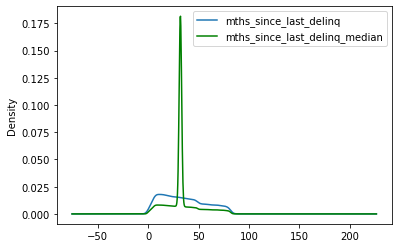

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111)
newdata['mths_since_last_delinq'].plot(kind='kde',ax=ax)
newdata['mths_since_last_delinq_median'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#We can see that there is a huge variance between the original and imputed variable with median. 
#Hence this is not a good imputation method, we shall try random sample method

### Imputing months since last delinquency by random sampling method

In [16]:
# make a copy from the original variable, with NA
newdata['mths_since_last_delinq_random']=newdata['mths_since_last_delinq'].copy()

In [17]:
# extract the random sample to fill the na:
# dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs
# sample() is the method that will do the random sampling
#.isnull().sum() is the number of random values to extract. I want to extract as many values as NAs are present in the original variable
random_sample=newdata['mths_since_last_delinq'].dropna().sample(newdata['mths_since_last_delinq'].isnull().sum(),random_state=0,replace=True)

# pandas needs to have the same index in order to merge datasets
random_sample.index=newdata[newdata['mths_since_last_delinq'].isnull()].index

# replace the NA in the newly created variable
newdata.loc[newdata['mths_since_last_delinq'].isnull(),'mths_since_last_delinq_random']=random_sample

In [18]:
newdata['mths_since_last_delinq_random'].isnull().sum()

0

In [19]:
print(newdata['mths_since_last_delinq'].std())
print(newdata['mths_since_last_delinq_random'].std())

21.792491930232867
21.78433336150761


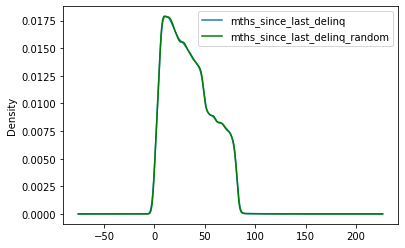

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111)
newdata['mths_since_last_delinq'].plot(kind='kde',ax=ax)
newdata['mths_since_last_delinq_random'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#We can see that the variance is almost negligible here 
#hence we'll keep the random sample imputed one and drop the other two; original and median imputed variables

In [22]:
newdata.shape

(226786, 37)

In [23]:
#Dropping original and median imputed variables
newdata=newdata.drop(['mths_since_last_delinq','mths_since_last_delinq_median'],axis=1)

In [24]:
newdata.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                       8400
home_ownership                      0
annual_inc                          0
verification_status                 0
pymnt_plan                          0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
open_acc                            0
revol_bal                           0
revol_util                        164
total_acc                           0
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_pr

In [25]:
#Imputing Revolving credit utilization by median
median=newdata['revol_util'].median()
median

55.0

In [26]:
def impute_nan(newdata,variable,median):
    newdata[variable+"_median"]=newdata[variable].fillna(median)

In [27]:
impute_nan(newdata,"revol_util",median)

In [28]:
print(newdata["revol_util"].std())
print(newdata["revol_util_median"].std())

24.866329081334566
24.857361985198217


In [29]:
newdata["revol_util_median"].isnull().sum()

0

### Imputing Emp_length using random sample technique

In [30]:
#checking the categories in emp_length
newdata['emp_length'].value_counts()

10+ years    69626
2 years      21235
< 1 year     18660
3 years      18447
5 years      15986
1 year       15183
4 years      14525
6 years      13055
7 years      12464
8 years      10657
9 years       8548
Name: emp_length, dtype: int64

In [31]:
# make a copy from the original variable, with NA
newdata['emp_length_random']=newdata['emp_length'].copy()

In [32]:
#dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs
#sample() is the method that will do the random sampling
random_sample=newdata['emp_length'].dropna().sample(newdata['emp_length'].isnull().sum(),random_state=0,replace=True)

# pandas needs to have the same index in order to merge datasets
random_sample.index=newdata[newdata['emp_length'].isnull()].index

# replace the NA in the newly created variable
newdata.loc[newdata['emp_length'].isnull(),'emp_length_random']=random_sample

In [33]:
newdata['emp_length_random'].isnull().sum()

0

In [34]:
newdata['emp_length_random'].value_counts()

10+ years    72287
2 years      22040
< 1 year     19373
3 years      19157
5 years      16596
1 year       15798
4 years      15104
6 years      13571
7 years      12923
8 years      11070
9 years       8867
Name: emp_length_random, dtype: int64

In [35]:
newdata=newdata.drop(["emp_length","revol_util","member_id"],axis=1)

In [36]:
newdata.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
home_ownership                   0
annual_inc                       0
verification_status              0
pymnt_plan                       0
purpose                          0
addr_state                       0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
revol_bal                        0
total_acc                        0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
last_pymnt_amnt     

In [37]:
newdata.dtypes

loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
home_ownership                    object
annual_inc                       float64
verification_status               object
pymnt_plan                        object
purpose                           object
addr_state                        object
dti                              float64
delinq_2yrs                        int64
inq_last_6mths                     int64
open_acc                           int64
revol_bal                          int64
total_acc                          int64
out_prncp                        float64
out_prncp_inv                    float64
total_pymnt                      float64
total_pymnt_inv                  float64
total_rec_prncp                  float64
total_rec_int   

In [38]:
#Changing object dtypes to categorical

In [39]:
newdata['term']=newdata.term.astype('category')

In [40]:
newdata['grade']=newdata.grade.astype('category')

In [41]:
newdata['home_ownership']=newdata.home_ownership.astype('category')

In [42]:
newdata['verification_status']=newdata.verification_status.astype('category')

In [43]:
newdata['pymnt_plan']=newdata.pymnt_plan.astype('category')

In [44]:
newdata['purpose']=newdata.purpose.astype('category')

In [45]:
newdata['addr_state']=newdata.addr_state.astype('category')

In [46]:
newdata['application_type']=newdata.application_type.astype('category')

In [47]:
newdata['emp_length_random']=newdata.emp_length_random.astype('category')

In [48]:
newdata['loan_status']=newdata.loan_status.astype('category')

In [49]:
newdata['inq_last_6mths']=newdata.inq_last_6mths.astype('int64')

In [50]:
newdata.dtypes

loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                             category
int_rate                          float64
installment                       float64
grade                            category
home_ownership                   category
annual_inc                        float64
verification_status              category
pymnt_plan                       category
purpose                          category
addr_state                       category
dti                               float64
delinq_2yrs                         int64
inq_last_6mths                      int64
open_acc                            int64
revol_bal                           int64
total_acc                           int64
out_prncp                         float64
out_prncp_inv                     float64
total_pymnt                       float64
total_pymnt_inv                   float64
total_rec_prncp                   

### Univariate Analysis

Text(0.5, 1.0, 'Loan Amount - Right Skewed')

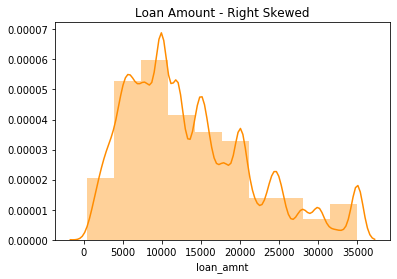

In [51]:
#Now we have gotten rid of all missing values. We can start with some data exploration now
import seaborn as sns
sns.distplot(newdata['loan_amnt'],bins=10,color='darkorange').set_title("Loan Amount - Right Skewed")

Text(0.5, 1.0, 'Funded Amount - Right Skewed')

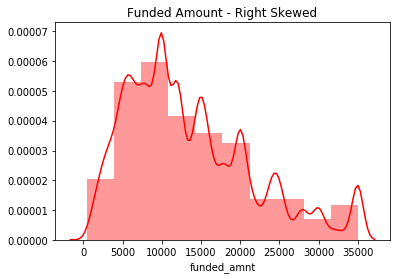

In [52]:
sns.distplot(newdata['funded_amnt'],bins=10,color='red').set_title("Funded Amount - Right Skewed")

Text(0.5, 1.0, 'Funded amount invested - Right Skewed')

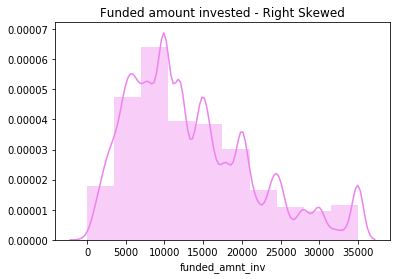

In [53]:
sns.distplot(newdata['funded_amnt_inv'],bins=10,color='violet').set_title("Funded amount invested - Right Skewed")

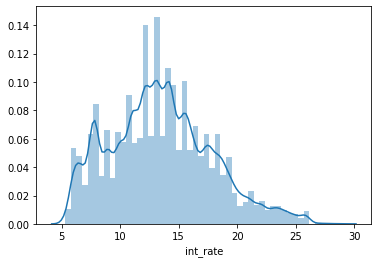

In [54]:
sns.distplot(newdata["int_rate"])

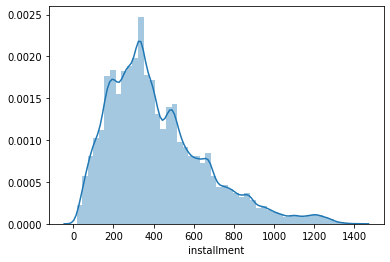

In [55]:
sns.distplot(newdata["installment"])

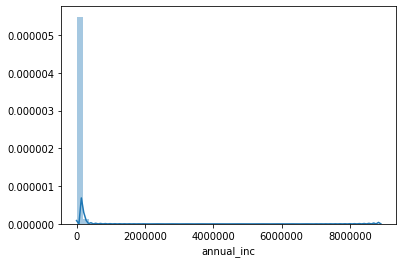

In [56]:
sns.distplot(newdata["annual_inc"])

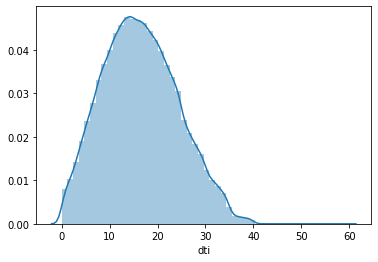

In [57]:
sns.distplot(newdata["dti"])

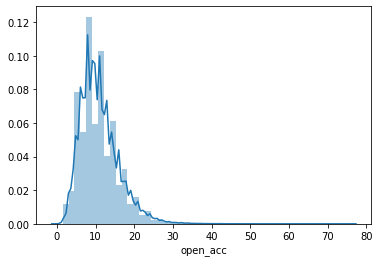

In [58]:
sns.distplot(newdata["open_acc"])

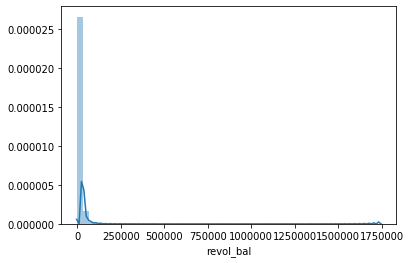

In [59]:
sns.distplot(newdata["revol_bal"])

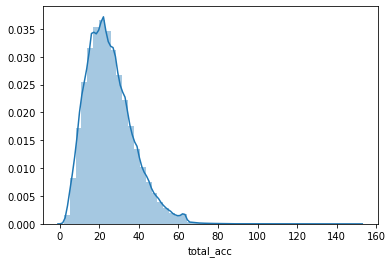

In [60]:
sns.distplot(newdata["total_acc"])

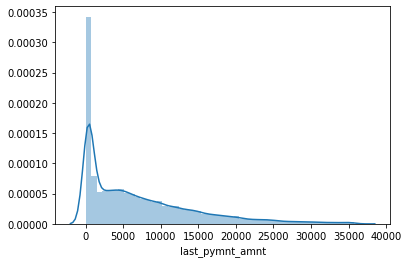

In [61]:
sns.distplot(newdata["last_pymnt_amnt"])

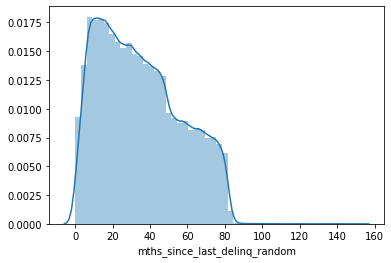

In [62]:
sns.distplot(newdata["mths_since_last_delinq_random"])

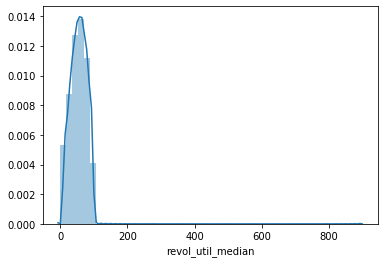

In [63]:
sns.distplot(newdata["revol_util_median"])

### Multivariate Analysis:

In [64]:
newdata.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'application_type',
       'loan_status', 'mths_since_last_delinq_random', 'revol_util_median',
       'emp_length_random'],
      dtype='object')

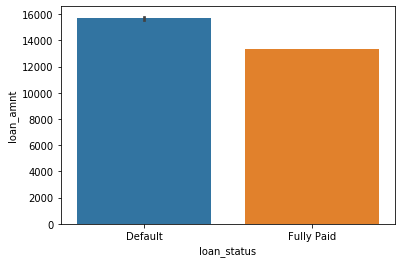

In [65]:
sns.barplot(x='loan_status',y='loan_amnt',data=newdata)

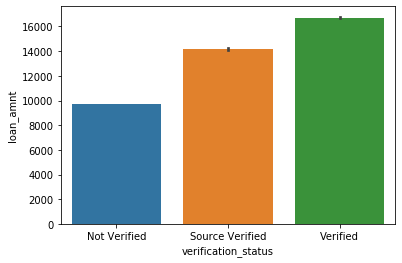

In [66]:
sns.barplot(x='verification_status',y='loan_amnt',data=newdata)

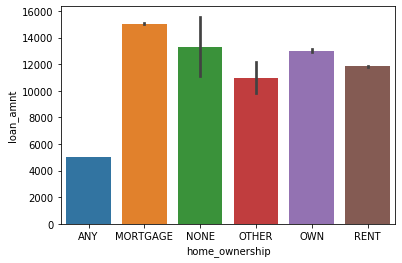

In [67]:
#categorical vs numeric
sns.barplot(x='home_ownership',y='loan_amnt',data=newdata)

#We can see that highest amount of loan were taken by people who are paying there home mortgages followed by none

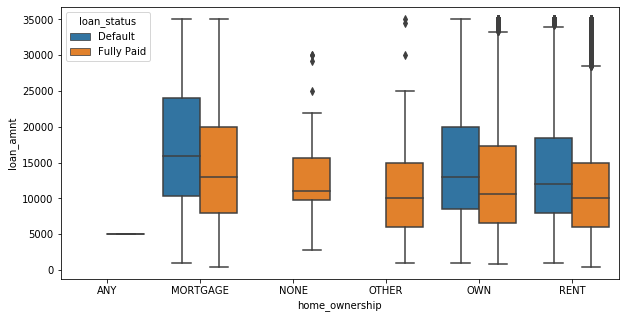

In [68]:
#2 categorical vs 1 numeric
plt.figure(figsize=(10,5))
sns.boxplot(x='home_ownership',y='loan_amnt',data=newdata,hue='loan_status')
#We can again see that highest number of defaults were done by people who are paying there home mortgages

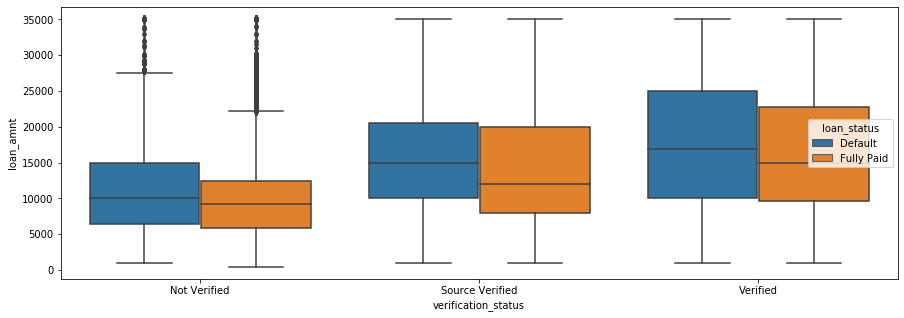

In [69]:
#2 categorical vs 1 numeric
plt.figure(figsize=(15,5))
sns.boxplot(x='verification_status',y='loan_amnt',data=newdata,hue='loan_status')

#Interestingly, people with verified profiles tend to default on their loans
#Also, people with verified profiles also had highest number of fully paid loans

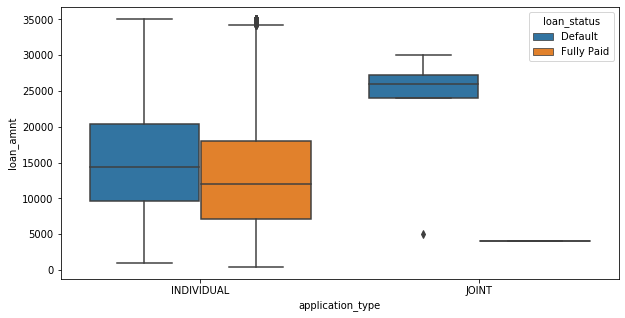

In [70]:
#2 categorical vs 1 numeric
plt.figure(figsize=(10,5))
sns.boxplot(x='application_type',y='loan_amnt',data=newdata,hue='loan_status')

#So it looks like joint applicants with higher loan amounts are likely to default on their loans
#Also, individual applicants with lower loan amounts are more likely to default on their loans

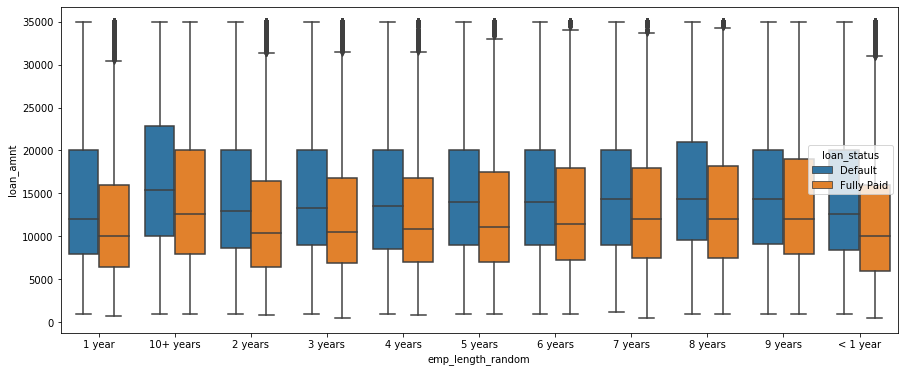

In [71]:
#2 categorical vs 1 numeric
plt.figure(figsize=(15,6))
sns.boxplot(x='emp_length_random',y='loan_amnt',data=newdata,hue='loan_status')
#We can clearly see that employee with 10+ years of tenure tend to have applied for higher loan amts 
#and also are more likely to default

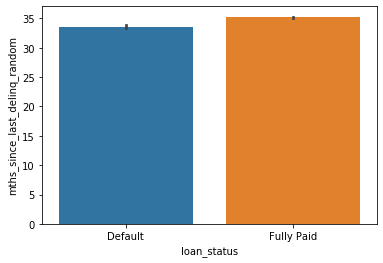

In [72]:
#categorical vs numeric
sns.barplot(x='loan_status',y='mths_since_last_delinq_random',data=newdata)

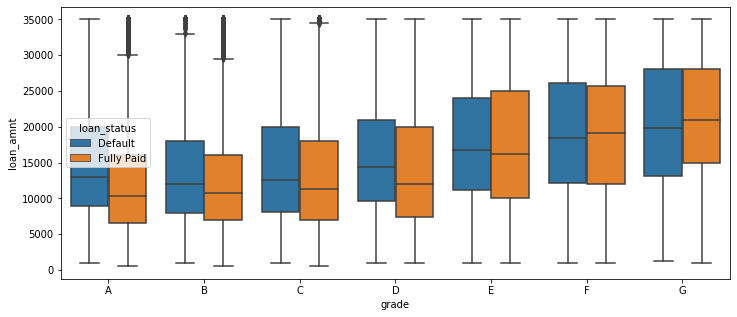

In [73]:
#2 categorical vs 1 numeric
plt.figure(figsize=(12,5))
sns.boxplot(x='grade',y='loan_amnt',data=newdata,hue='loan_status')
#Customers with highest loan amounts along with G grade loans were the highest of all to default on loans

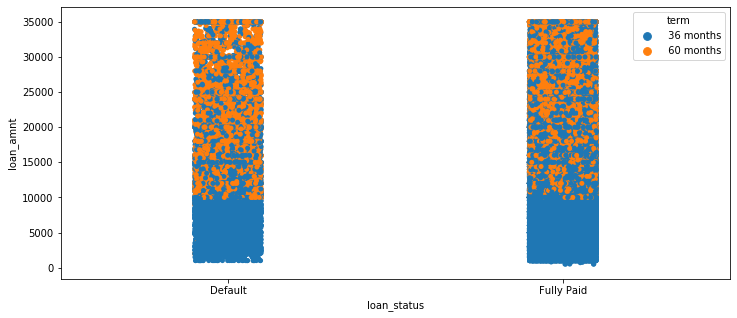

In [74]:
#2 categorical vs 1 numeric
plt.figure(figsize=(12,5))
sns.stripplot(x='loan_status',y='loan_amnt',data=newdata,jitter=True,hue='term')

#Customers with a term of 60 months are more likely to default on their loans

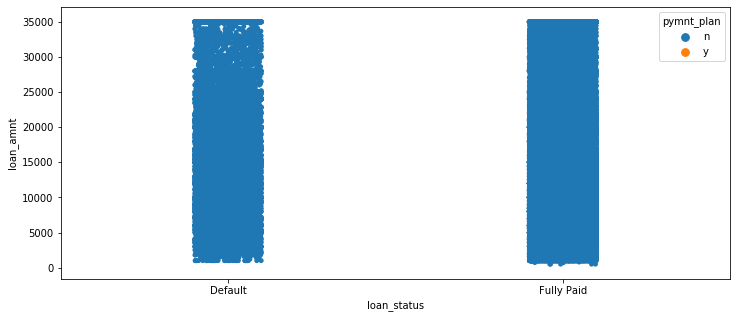

In [75]:
#2 categorical vs 1 numeric
plt.figure(figsize=(12,5))
sns.stripplot(x='loan_status',y='loan_amnt',data=newdata,jitter=True,hue='pymnt_plan')

#Looks like no payment plan is put in place what so ever

Text(0.5, 1.0, 'State vs Loan Status')

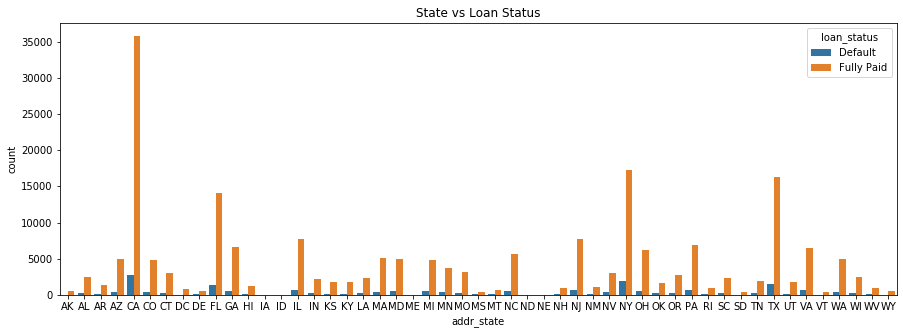

In [76]:
#2 categorical 
plt.figure(figsize=(15,5))
sns.countplot(x='addr_state',data=newdata,hue='loan_status').set_title("State vs Loan Status")
#It is evident from the below chart that California appears to be with the highest number of default cases 
#compared to other states


Text(0.5, 1.0, 'Verification Status vs Loan Status')

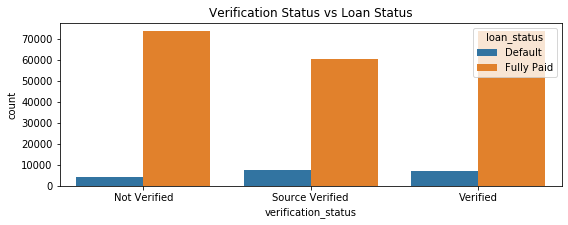

In [77]:
#2 categorical 
plt.figure(figsize=(9,3))
sns.countplot(x='verification_status',data=newdata,hue='loan_status').set_title("Verification Status vs Loan Status")
#It is evident from the below chart that source verified customers are more likely to be with the highest 
#number of default cases 

Text(0.5, 1.0, 'Home Ownership vs Loan Status')

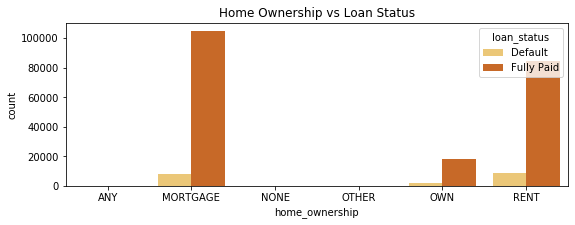

In [78]:
#2 categorical 
plt.figure(figsize=(9,3))
sns.countplot(x='home_ownership',data=newdata,hue='loan_status',palette='YlOrBr').set_title("Home Ownership vs Loan Status")
#It is evident from the below chart that majority of the defaulters were amongst the group who took loan for the purpose of
#paying mortgage or rent

Text(0.5, 1.0, 'Term vs Loan Status')

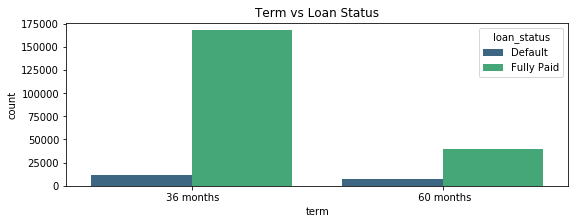

In [79]:
#2 categorical 
plt.figure(figsize=(9,3))
sns.countplot(x='term',data=newdata,hue='loan_status',palette='viridis').set_title("Term vs Loan Status")
#It is evident from the below chart that majority of the defaulters were amongst the group who took loan for the tenure of 
#36 months

Text(0.5, 1.0, 'Application Type vs Loan Status')

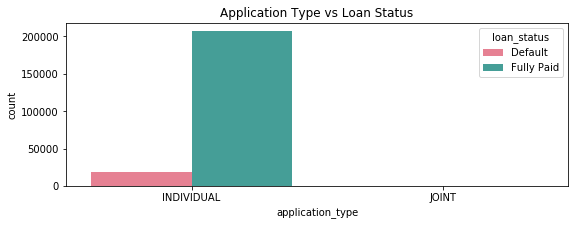

In [80]:
#2 categorical 
plt.figure(figsize=(9,3))
sns.countplot(x='application_type',data=newdata,hue='loan_status',palette='husl').set_title("Application Type vs Loan Status")
#It is evident from the below chart that defaulters were primarily with the individual application loan type

In [81]:
newdata['loan_status'].value_counts()

Fully Paid    207723
Default        19063
Name: loan_status, dtype: int64

In [82]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226786 entries, 0 to 226785
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   loan_amnt                      226786 non-null  int64   
 1   funded_amnt                    226786 non-null  int64   
 2   funded_amnt_inv                226786 non-null  float64 
 3   term                           226786 non-null  category
 4   int_rate                       226786 non-null  float64 
 5   installment                    226786 non-null  float64 
 6   grade                          226786 non-null  category
 7   home_ownership                 226786 non-null  category
 8   annual_inc                     226786 non-null  float64 
 9   verification_status            226786 non-null  category
 10  pymnt_plan                     226786 non-null  category
 11  purpose                        226786 non-null  category
 12  addr_state      

In [360]:
newdata.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,loan_status,mths_since_last_delinq_random,revol_util_median,emp_length_random
0,5000,5000,4975.0,36 months,10.65,162.87,B,RENT,24000.0,Verified,...,861.07,0.00,0,0,171.62,INDIVIDUAL,Fully Paid,24.0,83.7,10+ years
1,2400,2400,2400.0,36 months,15.96,84.33,C,RENT,12252.0,Not Verified,...,603.65,0.00,0,0,649.91,INDIVIDUAL,Fully Paid,15.0,98.5,10+ years
2,10000,10000,10000.0,36 months,13.49,339.31,C,RENT,49200.0,Source Verified,...,2209.33,16.97,0,0,357.48,INDIVIDUAL,Fully Paid,35.0,21.0,10+ years
3,5000,5000,5000.0,36 months,7.90,156.46,A,RENT,36000.0,Source Verified,...,631.38,0.00,0,0,161.03,INDIVIDUAL,Fully Paid,20.0,28.3,3 years
4,3000,3000,3000.0,36 months,18.64,109.43,E,RENT,48000.0,Source Verified,...,938.14,0.00,0,0,111.34,INDIVIDUAL,Fully Paid,31.0,87.5,9 years


In [362]:
newdata.nunique()

loan_amnt                          1334
funded_amnt                        1334
funded_amnt_inv                    7270
term                                  2
int_rate                            503
installment                       42549
grade                                 7
home_ownership                        6
annual_inc                        17841
verification_status                   3
pymnt_plan                            2
purpose                              14
addr_state                           51
dti                                3981
delinq_2yrs                          24
inq_last_6mths                        9
open_acc                             59
revol_bal                         46096
total_acc                           107
out_prncp                         17428
out_prncp_inv                     17601
total_pymnt                      216709
total_pymnt_inv                  211635
total_rec_prncp                   20373
total_rec_int                    168590


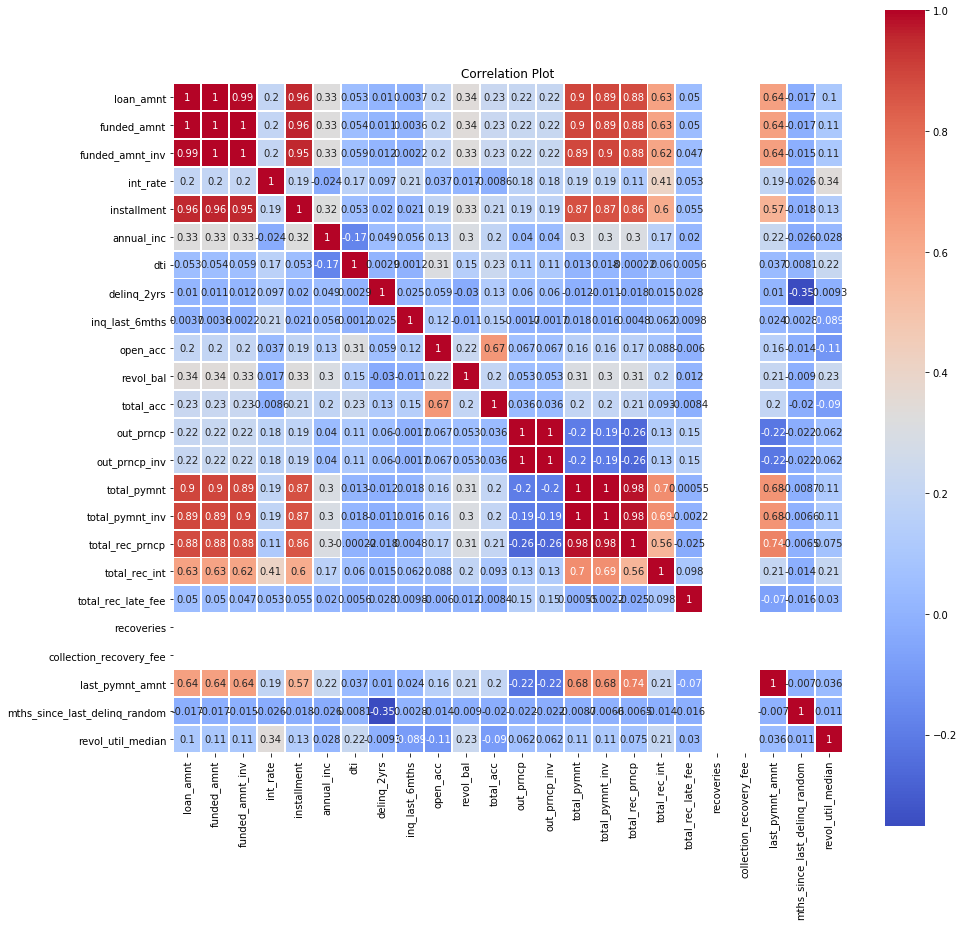

In [84]:
#Plotting correlation plot

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(15,15))
plt.title('Correlation Plot')
corrplot=newdata.corr()
sns.heatmap(corrplot,annot=True,cmap='coolwarm',linewidth=1,square=True)

In [ ]:
# Below are the list of highly correlated variables:
#Funded amount and Loan Amount (100%)
#Funded amount and Funded amount invested(100%)
#Funded amount and installment(96%)
#Funded amount and Total payment(90%)
#Funded amount and Total payment invested(89%)
#Funded amount and Total received principal(88%)
#Funded amount and Total received interest(63%)
#Funded amount and Last payment amount(64%)


In [90]:
newdata.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'application_type',
       'loan_status', 'mths_since_last_delinq_random', 'revol_util_median',
       'emp_length_random'],
      dtype='object')

In [96]:
#Accumulating numerical variables in a data frame

num_var=newdata[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs',
                'inq_last_6mths','open_acc','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt',
                'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                'last_pymnt_amnt','mths_since_last_delinq_random','revol_util_median']]

In [97]:
num_var.shape

(226786, 24)

In [98]:
num_var=pd.DataFrame(num_var)

In [99]:
num_var.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,mths_since_last_delinq_random,revol_util_median
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0,1,3,...,5861.071414,5831.78,5000.0,861.07,0.00,0,0,171.62,24.0,83.7
1,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0,2,2,...,3003.653644,3003.65,2400.0,603.65,0.00,0,0,649.91,15.0,98.5
2,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0,1,10,...,12226.302210,12226.30,10000.0,2209.33,16.97,0,0,357.48,35.0,21.0
3,5000,5000,5000.0,7.90,156.46,36000.0,11.20,0,3,9,...,5631.377753,5631.38,5000.0,631.38,0.00,0,0,161.03,20.0,28.3
4,3000,3000,3000.0,18.64,109.43,48000.0,5.35,0,2,4,...,3938.144334,3938.14,3000.0,938.14,0.00,0,0,111.34,31.0,87.5


In [100]:
num_var.shape[1]

24

#### PCA Steps:
1. Standardize the dataset
2. Use the standardize data to create a covariance matrix
3. Use the resulting matrix to calculate eigenvectors (PCs) and their corresponding eigenvalues
4. Sort the components in descending order by its eigenvalue
5. Choose n components which explains the most variance within the dataset
6. Create a new matrix using the n components

In [101]:
#Step 1: Standardising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(num_var)
scaled_data=scaler.transform(num_var)

In [104]:
scaled_data.shape

(226786, 24)

In [148]:
scaled_data=pd.DataFrame(scaled_data)

In [150]:
scaled_data.columns =['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs',
                'inq_last_6mths','open_acc','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt',
                'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                'last_pymnt_amnt','mths_since_last_delinq_random','revol_util_median']

In [151]:
scaled_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,mths_since_last_delinq_random,revol_util_median
0,-1.051210,-1.049159,-1.040056,-0.654562,-1.039672,-0.814695,1.432973,-0.340946,0.166917,-1.619642,...,-0.902493,-0.895185,-0.915156,-0.522336,-0.118626,0.0,0.0,-0.936014,-0.507276,1.207936
1,-1.371130,-1.369817,-1.356936,0.570805,-1.359738,-1.006251,-0.986406,-0.340946,1.117605,-1.822406,...,-1.202571,-1.192117,-1.232272,-0.645703,-0.118626,0.0,0.0,-0.871950,-0.920418,1.803335
2,-0.435980,-0.432509,-0.421678,0.000813,-0.320642,-0.403798,0.455252,-0.340946,0.166917,-0.200293,...,-0.234034,-0.223811,-0.305318,0.123814,3.297242,0.0,0.0,-0.911119,-0.002325,-1.314461
3,-1.051210,-1.049159,-1.036979,-1.289168,-1.065794,-0.619030,-0.669446,-0.340946,2.068293,-0.403057,...,-0.926615,-0.916225,-0.915156,-0.632414,-0.118626,0.0,0.0,-0.937433,-0.690895,-1.020784
4,-1.297302,-1.295819,-1.283100,1.189257,-1.257451,-0.423364,-1.417115,-0.340946,1.117605,-1.416878,...,-1.104434,-1.094002,-1.159091,-0.485400,-0.118626,0.0,0.0,-0.944088,-0.185944,1.360809


In [152]:
#Step 2: Creating Covariance Matrix

#Creating function to calculate Covariance Matrix
def ComputeCovarianceMatrix (data):
    len_data = data.shape[0]
    covariance = data.T.dot(data)/len_data
    return covariance

In [153]:
cov_mat = ComputeCovarianceMatrix(scaled_data)
cov_mat = np.around(cov_mat,3)
cov_mat

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,mths_since_last_delinq_random,revol_util_median
loan_amnt,1.000,0.998,0.993,0.200,0.956,0.329,0.053,0.010,0.004,0.201,...,0.895,0.892,0.879,0.631,0.050,0.0,0.0,0.639,-0.017,0.104
funded_amnt,0.998,1.000,0.996,0.202,0.959,0.328,0.054,0.011,0.004,0.202,...,0.896,0.894,0.880,0.630,0.050,0.0,0.0,0.641,-0.017,0.106
funded_amnt_inv,0.993,0.996,1.000,0.204,0.955,0.326,0.059,0.012,0.002,0.203,...,0.891,0.897,0.875,0.625,0.047,0.0,0.0,0.643,-0.015,0.108
int_rate,0.200,0.202,0.204,1.000,0.193,-0.024,0.170,0.097,0.212,0.037,...,0.189,0.192,0.115,0.414,0.053,0.0,0.0,0.194,-0.026,0.336
installment,0.956,0.959,0.955,0.193,1.000,0.323,0.053,0.020,0.021,0.194,...,0.869,0.866,0.857,0.596,0.055,0.0,0.0,0.571,-0.018,0.133
annual_inc,0.329,0.328,0.326,-0.024,0.323,1.000,-0.169,0.049,0.056,0.134,...,0.299,0.297,0.304,0.168,0.020,0.0,0.0,0.222,-0.026,0.028
dti,0.053,0.054,0.059,0.170,0.053,-0.169,1.000,0.003,0.001,0.310,...,0.013,0.018,-0.000,0.060,0.006,0.0,0.0,0.037,0.008,0.219
delinq_2yrs,0.010,0.011,0.012,0.097,0.020,0.049,0.003,1.000,0.025,0.059,...,-0.012,-0.011,-0.018,0.015,0.028,0.0,0.0,0.010,-0.351,-0.009
inq_last_6mths,0.004,0.004,0.002,0.212,0.021,0.056,0.001,0.025,1.000,0.119,...,0.018,0.016,0.005,0.062,0.010,0.0,0.0,0.024,0.003,-0.089
open_acc,0.201,0.202,0.203,0.037,0.194,0.134,0.310,0.059,0.119,1.000,...,0.163,0.165,0.167,0.088,-0.006,0.0,0.0,0.160,-0.014,-0.112


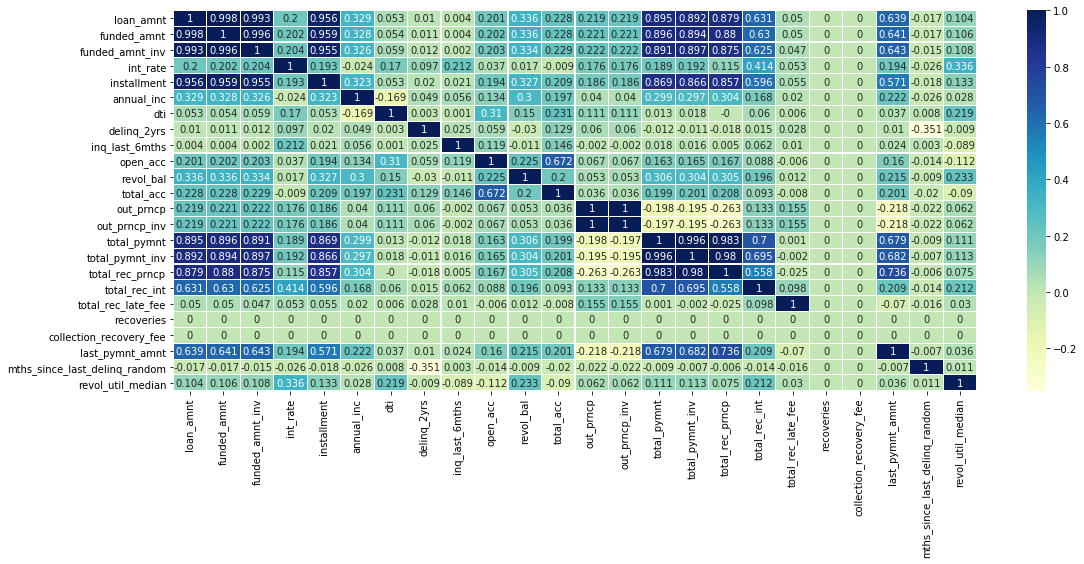

In [156]:
#Plotting Covariance matrix as heatmap:

fig = plt.figure(figsize=(18,7))
sns.heatmap(cov_mat,annot=True,fmt='g',linewidth=.1,cmap='YlGnBu')
plt.show()

In [ ]:
#Step 3: Eigen Decomposition of Covariance Matrix
#We already know that each Principal Component has two things:
#  1. Eigenvector: Tells the direction of the PC
#  2. Eigenvalue: gives variances explained by each PC and their relative importance
#  Higher the eigenvalue, more variance is captured & hence more significant that PC is


In [158]:
from numpy.linalg import eig
eig_values, eig_vectors=np.linalg.eig(cov_mat)
print('\nNumber of Eigenvectors : %s ' %len(eig_vectors))
print('\nEigenvectors : \n\n%s' %eig_vectors)
print('\nEigenvalues: \n\n%s' %eig_values)


Number of Eigenvectors : 24 

Eigenvectors : 

[[-3.44519965e-01  8.56903026e-02  5.59927363e-02  9.98891501e-02
  -2.07841541e-02 -9.82796346e-03 -7.88200699e-02  2.39124874e-02
   4.88760806e-02  4.22477349e-02 -2.06781462e-02  2.16786442e-02
  -4.75932869e-02 -1.75384843e-02 -7.22580520e-02  2.01718054e-01
   4.88231402e-01  4.57654607e-01 -5.73181520e-01  1.28388629e-01
   7.30447082e-02 -4.25191689e-02  0.00000000e+00  0.00000000e+00]
 [-3.45023397e-01  8.67363601e-02  5.61260474e-02  9.88264807e-02
  -2.05157358e-02 -9.70381631e-03 -8.01326234e-02  2.47315770e-02
   4.90753959e-02  4.59296696e-02 -2.04749245e-02  2.06852729e-02
  -4.98291988e-02 -2.10607735e-02 -7.62054721e-02  1.82100051e-01
   2.26122077e-01  1.83597059e-01  6.64302611e-01 -3.16686171e-01
   4.22970472e-01  1.95059459e-02  0.00000000e+00  0.00000000e+00]
 [-3.44253800e-01  8.74339052e-02  5.46278125e-02  9.58842204e-02
  -2.18477119e-02 -8.59200635e-03 -8.38089671e-02  2.79798627e-02
   4.68116818e-02  5.32909

In [ ]:
#Step 4: Visualizing above eigenvectors as a dataframe (or coefficient matrix)

#Each PC is a linear combination of the original variables or attributes
#The first row is the coefficients that generated the first PC

# PC1 = (loan amt* ) + (funded amt* ) + ..+ (revolutilmedian*)
# Similarly PC2 and so on..

In [161]:
eigenvector_df=pd.DataFrame(eig_vectors)
eigenvector_df.columns = ['eigvec_'+str(i+1) for i in range(0,len(eig_vectors))]
eigenvector_df.T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
eigvec_1,-0.344520,-0.345023,-0.344254,-0.090240,-0.334186,-0.132724,-0.027477,-0.006437,-0.013141,-0.090991,...,-0.340326,-0.340103,-0.333216,-0.243572,-0.011810,0.0,0.0,-0.248599,0.006960,-0.053484
eigvec_2,0.085690,0.086736,0.087434,0.189562,0.076551,0.005894,0.164625,0.085430,0.033140,0.101440,...,-0.150523,-0.149105,-0.201741,0.105615,0.157691,0.0,0.0,-0.189148,-0.042441,0.111486
eigvec_3,0.055993,0.056126,0.054628,0.117414,0.058370,-0.104877,-0.274545,-0.139790,-0.173375,-0.601137,...,0.049500,0.047797,0.017060,0.158183,0.075181,0.0,0.0,-0.059355,0.069829,0.187558
eigvec_4,0.099889,0.098826,0.095884,-0.515075,0.083181,0.274172,-0.463963,0.005660,-0.122639,-0.033835,...,-0.030726,-0.033260,0.011805,-0.188363,0.031935,0.0,0.0,-0.028485,-0.033870,-0.531705
eigvec_5,-0.020784,-0.020516,-0.021848,0.190370,-0.013479,0.029554,-0.167960,0.660364,0.146924,-0.095599,...,0.021389,0.019941,0.006649,0.069596,0.057077,0.0,0.0,0.026629,-0.643853,-0.053273
eigvec_6,-0.009828,-0.009704,-0.008592,-0.278966,-0.001019,0.191810,0.141585,0.153958,-0.622387,-0.053325,...,-0.031716,-0.031102,-0.001108,-0.142474,-0.057745,0.0,0.0,-0.021531,-0.262867,0.377283
eigvec_7,-0.078820,-0.080133,-0.083809,0.131763,-0.055926,0.624126,-0.330783,-0.063382,0.423699,-0.067486,...,-0.032375,-0.036906,-0.052729,0.057127,0.171369,0.0,0.0,-0.089401,0.099700,0.232429
eigvec_8,0.023912,0.024732,0.027980,0.113054,0.012269,0.106706,-0.073504,0.017928,0.138131,-0.069203,...,-0.049618,-0.045916,-0.031740,-0.096724,-0.941810,0.0,0.0,0.097913,-0.008223,0.046318
eigvec_9,0.048876,0.049075,0.046812,-0.230235,0.054558,-0.251234,0.252208,-0.310779,0.462361,-0.153335,...,-0.020216,-0.022594,0.033018,-0.225866,0.068621,0.0,0.0,0.095265,-0.442706,-0.121783
eigvec_10,0.042248,0.045930,0.053291,0.157063,0.017533,0.089639,0.080145,0.223233,0.026379,-0.126244,...,-0.116327,-0.107706,0.017004,-0.593709,0.195317,0.0,0.0,0.615135,0.260767,0.090576


In [162]:
#Step 5: Sorting Eigenvalues in descending order

indexes = eig_values.argsort()[::-1]
eig_values = eig_values[indexes]
eig_vectors = eig_vectors[:,indexes]
sorted_eig_pairs = [(np.around(np.abs(eig_values[i]),3),eig_vectors[:,i]) for i in range (len(eig_values))]
print('\nSorted Eigen Pairs (descending order) :\n')

sorted_eigenValues=[]
for i in range(0,len(sorted_eig_pairs)):
    print("eigenvec_{0} : {1}". format(str(i+1), str(sorted_eig_pairs[i][0])))
    sorted_eigenValues.append(sorted_eig_pairs[i][0])
    
print("\nTotal Variance (Sum of all eigen values):",round(sum(sorted_eigenValues),3))


Sorted Eigen Pairs (descending order) :

eigenvec_1 : 7.92
eigenvec_2 : 2.572
eigenvec_3 : 1.841
eigenvec_4 : 1.478
eigenvec_5 : 1.364
eigenvec_6 : 1.174
eigenvec_7 : 1.066
eigenvec_8 : 0.961
eigenvec_9 : 0.719
eigenvec_10 : 0.686
eigenvec_11 : 0.599
eigenvec_12 : 0.534
eigenvec_13 : 0.5
eigenvec_14 : 0.31
eigenvec_15 : 0.205
eigenvec_16 : 0.051
eigenvec_17 : 0.012
eigenvec_18 : 0.007
eigenvec_19 : 0.002
eigenvec_20 : 0.001
eigenvec_21 : 0.0
eigenvec_22 : 0.0
eigenvec_23 : 0.0
eigenvec_24 : 0.0

Total Variance (Sum of all eigen values): 22.002


In [167]:
#Step 6: Deciding the Value of K (Optimal number of PCs)

#Method 1: Kaiser Stopping Rule
best_eig_pairs = [sorted_eig_pairs[i][0] for i in range(0,len(sorted_eig_pairs)) if sorted_eig_pairs[i][0] > 1.0]
print("\nAccording to Kaiser's Stopping Rule :")
print("Number of PCs to be considered for PCA is : {}".format(str(len(best_eig_pairs))))
print("Their Eigenvalues are : {}".format(str(best_eig_pairs)))


According to Kaiser's Stopping Rule :
Number of PCs to be considered for PCA is : 7
Their Eigenvalues are : [7.92, 2.572, 1.841, 1.478, 1.364, 1.174, 1.066]


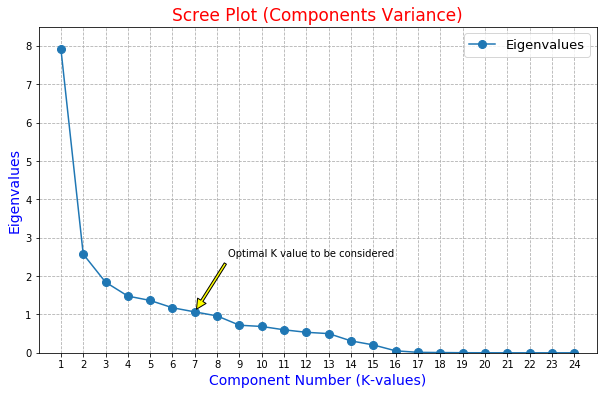

In [201]:
#Method 2:Scree Plot

fig = plt.figure(figsize=(10,6))
plt.title("Scree Plot (Components Variance)",color='Red',fontsize=17)
plt.xticks(np.arange(1,25,1))
plt.xlim(0,25)
plt.ylim(0,8.5)
plt.ylabel("Eigenvalues",fontsize=14,color='blue')
plt.xlabel("Component Number (K-values)",fontsize=14,color='blue')
plt.grid(linestyle='--')
plt.plot(range(1,25),sorted_eigenValues,linestyle='-',label='Eigenvalues',marker='o',markersize=8)
plt.annotate('Optimal K value to be considered', xy=(7,sorted_eigenValues[6]), 
             xytext=(8.5, 2.5),
            arrowprops=dict(facecolor='yellow', shrink=0.05,width=2.5,headwidth=10,headlength=10))

plt.legend(loc=1,prop={'size':13})

### Method 3: Cumulative Variance Plot

##### To find the variance explained by each component: We should divide each component's eigenvalue by the sum of all eigenvalues
##### To find the cumulative variance explained by components

##### 1. Explained Variance (EV): Fraction of total variance explained by each component
      EV(of each PC) = eigenvalue of that PC/sum of all eigenvalues
    
##### 2. Cumulative Variance (CV): Percentage of variance depicted by the first n components
      CV(of each PC) = sum of explained variances (EV) of the first n components

In [205]:
cumulative_variance = {}
ith_cumulative_variance = 0
for i in range(0,len(sorted_eig_pairs)):
    ith_explained_variance = sorted_eig_pairs[i][0]/sum(sorted_eigenValues)
    ith_cumulative_variance += ith_explained_variance
    cumulative_variance[str(i+1)] = round(ith_cumulative_variance*100,2)
    
print("\nCumulative Variance Percentage : ")
cumulative_variance


Cumulative Variance Percentage : 


{'1': 36.0,
 '2': 47.69,
 '3': 56.05,
 '4': 62.77,
 '5': 68.97,
 '6': 74.31,
 '7': 79.15,
 '8': 83.52,
 '9': 86.79,
 '10': 89.91,
 '11': 92.63,
 '12': 95.05,
 '13': 97.33,
 '14': 98.74,
 '15': 99.67,
 '16': 99.9,
 '17': 99.95,
 '18': 99.99,
 '19': 100.0,
 '20': 100.0,
 '21': 100.0,
 '22': 100.0,
 '23': 100.0,
 '24': 100.0}

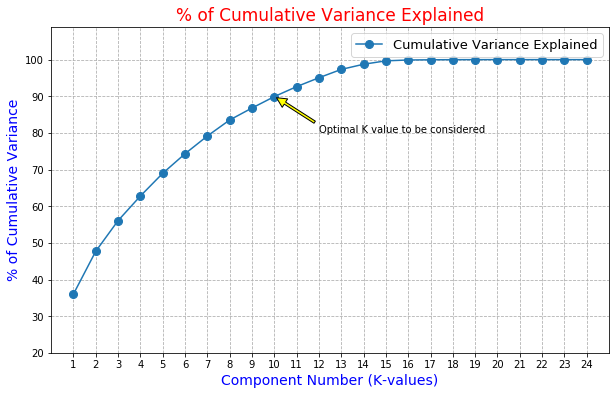

In [204]:
#Plotting the cumulative variance chart

fig = plt.figure(figsize=(10,6))
plt.title("% of Cumulative Variance Explained",color='Red',fontsize=17)
plt.xticks(np.arange(1,25,1))
plt.xlim(0,25)
plt.ylim(20,109)
plt.ylabel("% of Cumulative Variance",fontsize=14,color='blue')
plt.xlabel("Component Number (K-values)",fontsize=14,color='blue')
plt.grid(linestyle='--')
plt.plot(range(1,25),sorted(cumulative_variance.values()),linestyle='-',label='Cumulative Variance Explained',marker='o',markersize=8)
plt.annotate('Optimal K value to be considered', xy=(10,90), 
             xytext=(12,80),
            arrowprops=dict(facecolor='yellow', shrink=0.05,width=2.5,headwidth=10,headlength=10))

plt.legend(loc=1,prop={'size':13})

#We can finally go ahead with K=10, as it explains about 90% of the variance in the dataset

In [206]:
#Step 7: Creating the Projection Matrix
K=10
projection_matrix=np.array([list(np.hstack(i[1].reshape(24,1))) for i in sorted_eig_pairs[:]])
projection_matrix = projection_matrix[:K]
print("\nProjection Matrix Dimension...", projection_matrix.shape)
projection_matrix



Projection Matrix Dimension... (10, 24)


array([[-0.34451997, -0.3450234 , -0.3442538 , -0.09023962, -0.33418567,
        -0.13272353, -0.02747708, -0.00643699, -0.01314075, -0.09099074,
        -0.13968571, -0.10170794, -0.01592066, -0.01596363, -0.34032622,
        -0.3401031 , -0.33321579, -0.24357174, -0.01181001,  0.        ,
         0.        , -0.24859934,  0.00695956, -0.05348362],
       [ 0.0856903 ,  0.08673636,  0.08743391,  0.18956155,  0.07655074,
         0.00589395,  0.16462536,  0.08543045,  0.03313969,  0.10144013,
         0.06007364,  0.07076825,  0.59569628,  0.59563774, -0.15052305,
        -0.14910501, -0.20174139,  0.10561467,  0.15769129,  0.        ,
         0.        , -0.18914805, -0.04244132,  0.11148562],
       [ 0.05599274,  0.05612605,  0.05462781,  0.11741447,  0.0583701 ,
        -0.1048767 , -0.27454496, -0.13978952, -0.17337533, -0.6011368 ,
        -0.164837  , -0.59734706,  0.08037903,  0.08040592,  0.0494997 ,
         0.04779725,  0.01705995,  0.15818282,  0.07518114,  0.        ,
  

In [211]:
scaled_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'mths_since_last_delinq_random',
       'revol_util_median'],
      dtype='object')

In [208]:
#Step 8: Projection Matrix as Dataframe
projection_matrix_df = pd.DataFrame(projection_matrix)
projection_matrix_df.columns = [str(i+1) for i in range(0,len(eig_vectors))]
projection_matrix_df = projection_matrix_df.set_index([pd.Index(['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])])
projection_matrix_df.T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
1,-0.344520,0.085690,0.055993,0.099889,-0.020784,-0.009828,-0.078820,0.023912,0.048876,0.042248
2,-0.345023,0.086736,0.056126,0.098826,-0.020516,-0.009704,-0.080133,0.024732,0.049075,0.045930
3,-0.344254,0.087434,0.054628,0.095884,-0.021848,-0.008592,-0.083809,0.027980,0.046812,0.053291
4,-0.090240,0.189562,0.117414,-0.515075,0.190370,-0.278966,0.131763,0.113054,-0.230235,0.157063
5,-0.334186,0.076551,0.058370,0.083181,-0.013479,-0.001019,-0.055926,0.012269,0.054558,0.017533
6,-0.132724,0.005894,-0.104877,0.274172,0.029554,0.191810,0.624126,0.106706,-0.251234,0.089639
7,-0.027477,0.164625,-0.274545,-0.463963,-0.167960,0.141585,-0.330783,-0.073504,0.252208,0.080145
8,-0.006437,0.085430,-0.139790,0.005660,0.660364,0.153958,-0.063382,0.017928,-0.310779,0.223233
9,-0.013141,0.033140,-0.173375,-0.122639,0.146924,-0.622387,0.423699,0.138131,0.462361,0.026379
10,-0.090991,0.101440,-0.601137,-0.033835,-0.095599,-0.053325,-0.067486,-0.069203,-0.153335,-0.126244


In [210]:
#Step 9: Transformation of original dataset into new feature space
scaled_data.shape
transformedData = (scaled_data).dot(projection_matrix.T)
transformedData.columns = ['PC'+str(i+1) for i in range(0,K)]
transformedData

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.073742,-0.117590,1.218145,-1.476591,-0.121002,0.977820,-0.183920,0.032734,1.346320,-0.166863
1,3.855546,-0.196616,1.998096,-1.489916,1.007293,-0.206861,1.070676,0.510879,0.830157,-0.019295
2,1.073142,0.325599,-0.538687,0.294420,0.082913,-1.086940,0.032688,-3.447166,0.172713,-0.209924
3,3.210923,-0.643302,0.084939,0.843702,0.554601,-1.277983,0.615899,0.201894,1.810228,-0.688069
4,3.516466,-0.192184,2.169000,-1.285300,0.699838,-0.588319,1.692261,0.629895,0.298972,0.049855
...,...,...,...,...,...,...,...,...,...,...
226781,2.338235,-0.462801,-2.558767,1.227918,-0.527581,-1.183010,-0.392599,-0.266496,-0.721276,-0.366475
226782,-0.376065,-0.009832,0.009100,-0.929551,-0.812717,0.459337,-1.100085,-0.162428,0.060384,0.191655
226783,1.276857,-0.930605,-0.139895,1.679989,0.958492,0.891306,-1.028164,-0.122704,0.423481,0.255675
226784,2.548636,-0.153684,2.105746,-1.805723,0.967017,0.587738,0.086029,0.372941,1.006147,0.266029


In [213]:
#Renaming the columns leveraging the Projection Matrix

cols = ['Loan_amnt','Out_prncp','Active acc','Int_rate','Delinquency','Credit_util','Annual_inc','Late_fee','Inquiry','Last_pymnt']
transformedData.columns = cols
transformedData.head()

,Loan_amnt,Out_prncp,Active acc,Int_rate,Delinquency,Credit_util,Annual_inc,Late_fee,Inquiry,Last_pymnt
0,3.073742,-0.117590,1.218145,-1.476591,-0.121002,0.977820,-0.183920,0.032734,1.346320,-0.166863
1,3.855546,-0.196616,1.998096,-1.489916,1.007293,-0.206861,1.070676,0.510879,0.830157,-0.019295
2,1.073142,0.325599,-0.538687,0.294420,0.082913,-1.086940,0.032688,-3.447166,0.172713,-0.209924
3,3.210923,-0.643302,0.084939,0.843702,0.554601,-1.277983,0.615899,0.201894,1.810228,-0.688069
4,3.516466,-0.192184,2.169000,-1.285300,0.699838,-0.588319,1.692261,0.629895,0.298972,0.049855


In [215]:
transformedData.shape

(226786, 10)

##### Dropping the 24 numerical attributes from the original dataset in order concatenate transformed data of 10 attributes

In [217]:
final_data = newdata.drop(['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs',
                'inq_last_6mths','open_acc','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt',
                'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                'last_pymnt_amnt','mths_since_last_delinq_random','revol_util_median'],axis=1)

In [218]:
final_data.shape

(226786, 10)

In [219]:
#Merging transformed data with final_data

final_data.head()

,term,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,application_type,loan_status,emp_length_random
0,36 months,B,RENT,Verified,n,credit_card,AZ,INDIVIDUAL,Fully Paid,10+ years
1,36 months,C,RENT,Not Verified,n,small_business,IL,INDIVIDUAL,Fully Paid,10+ years
2,36 months,C,RENT,Source Verified,n,other,CA,INDIVIDUAL,Fully Paid,10+ years
3,36 months,A,RENT,Source Verified,n,wedding,AZ,INDIVIDUAL,Fully Paid,3 years
4,36 months,E,RENT,Source Verified,n,car,CA,INDIVIDUAL,Fully Paid,9 years


In [221]:
transformedData.shape

(226786, 10)

In [231]:
Mergedata = pd.merge(final_data,transformedData,left_index=True,right_index=True)

In [232]:
Mergedata.head()

,term,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,application_type,loan_status,emp_length_random,Loan_amnt,Out_prncp,Active acc,Int_rate,Delinquency,Credit_util,Annual_inc,Late_fee,Inquiry,Last_pymnt
0,36 months,B,RENT,Verified,n,credit_card,AZ,INDIVIDUAL,Fully Paid,10+ years,3.073742,-0.117590,1.218145,-1.476591,-0.121002,0.977820,-0.183920,0.032734,1.346320,-0.166863
1,36 months,C,RENT,Not Verified,n,small_business,IL,INDIVIDUAL,Fully Paid,10+ years,3.855546,-0.196616,1.998096,-1.489916,1.007293,-0.206861,1.070676,0.510879,0.830157,-0.019295
2,36 months,C,RENT,Source Verified,n,other,CA,INDIVIDUAL,Fully Paid,10+ years,1.073142,0.325599,-0.538687,0.294420,0.082913,-1.086940,0.032688,-3.447166,0.172713,-0.209924
3,36 months,A,RENT,Source Verified,n,wedding,AZ,INDIVIDUAL,Fully Paid,3 years,3.210923,-0.643302,0.084939,0.843702,0.554601,-1.277983,0.615899,0.201894,1.810228,-0.688069
4,36 months,E,RENT,Source Verified,n,car,CA,INDIVIDUAL,Fully Paid,9 years,3.516466,-0.192184,2.169000,-1.285300,0.699838,-0.588319,1.692261,0.629895,0.298972,0.049855


In [233]:
Mergedata.shape

(226786, 20)

In [256]:
Mergedata.nunique()

term                        2
grade                       7
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
addr_state                 51
application_type            2
loan_status                 2
emp_length_random          11
Loan_amnt              226786
Out_prncp              226786
Active acc             226786
Int_rate               226786
Delinquency            226786
Credit_util            226786
Annual_inc             226786
Late_fee               226786
Inquiry                226786
Last_pymnt             226786
dtype: int64

In [259]:
Mergedata['term'].value_counts()

 36 months    179291
 60 months     47495
Name: term, dtype: int64

In [260]:
Mergedata['pymnt_plan'].value_counts()

n    226780
y         6
Name: pymnt_plan, dtype: int64

In [261]:
Mergedata['application_type'].value_counts()

INDIVIDUAL    226780
JOINT              6
Name: application_type, dtype: int64

In [262]:
Mergedata['loan_status'].value_counts()

Fully Paid    207723
Default        19063
Name: loan_status, dtype: int64

#### Encoding Categorical Attributes in the dataset:

In [264]:
#Changing binary categories to 1s and 0s
Mergedata['term'] = Mergedata['term'].map(lambda s:1 if s=='36 months' else 0)
Mergedata['pymnt_plan'] = Mergedata['pymnt_plan'].map(lambda s:1 if s=='n' else 0)
Mergedata['application_type'] = Mergedata['application_type'].map(lambda s:1 if s=='INDIVIDUAL' else 0)
Mergedata['loan_status'] = Mergedata['loan_status'].map(lambda s:1 if s=='Default' else 0)

Mergedata.head()

,term,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,application_type,loan_status,emp_length_random,Loan_amnt,Out_prncp,Active acc,Int_rate,Delinquency,Credit_util,Annual_inc,Late_fee,Inquiry,Last_pymnt
0,0,B,RENT,Verified,0,credit_card,AZ,0,0,10+ years,3.073742,-0.117590,1.218145,-1.476591,-0.121002,0.977820,-0.183920,0.032734,1.346320,-0.166863
1,0,C,RENT,Not Verified,0,small_business,IL,0,0,10+ years,3.855546,-0.196616,1.998096,-1.489916,1.007293,-0.206861,1.070676,0.510879,0.830157,-0.019295
2,0,C,RENT,Source Verified,0,other,CA,0,0,10+ years,1.073142,0.325599,-0.538687,0.294420,0.082913,-1.086940,0.032688,-3.447166,0.172713,-0.209924
3,0,A,RENT,Source Verified,0,wedding,AZ,0,0,3 years,3.210923,-0.643302,0.084939,0.843702,0.554601,-1.277983,0.615899,0.201894,1.810228,-0.688069
4,0,E,RENT,Source Verified,0,car,CA,0,0,9 years,3.516466,-0.192184,2.169000,-1.285300,0.699838,-0.588319,1.692261,0.629895,0.298972,0.049855


In [ ]:
#Performing one hot encoding on categorical attributes: verification_status and home_ownership
Mergedata=pd.get_dummies(Mergedata,columns=['verification_status'],drop_first=True)
Mergedata=pd.get_dummies(Mergedata,columns=['home_ownership'],drop_first=True)

In [269]:
Mergedata=pd.get_dummies(Mergedata,columns=['grade'],drop_first=True)
Mergedata=pd.get_dummies(Mergedata,columns=['emp_length_random'],drop_first=True)

In [274]:
Mergedata.head()

,term,pymnt_plan,purpose,addr_state,application_type,loan_status,Loan_amnt,Out_prncp,Active acc,Int_rate,...,emp_length_random_10+ years,emp_length_random_2 years,emp_length_random_3 years,emp_length_random_4 years,emp_length_random_5 years,emp_length_random_6 years,emp_length_random_7 years,emp_length_random_8 years,emp_length_random_9 years,emp_length_random_< 1 year
0,0,0,credit_card,AZ,0,0,3.073742,-0.117590,1.218145,-1.476591,...,1,0,0,0,0,0,0,0,0,0
1,0,0,small_business,IL,0,0,3.855546,-0.196616,1.998096,-1.489916,...,1,0,0,0,0,0,0,0,0,0
2,0,0,other,CA,0,0,1.073142,0.325599,-0.538687,0.294420,...,1,0,0,0,0,0,0,0,0,0
3,0,0,wedding,AZ,0,0,3.210923,-0.643302,0.084939,0.843702,...,0,0,1,0,0,0,0,0,0,0
4,0,0,car,CA,0,0,3.516466,-0.192184,2.169000,-1.285300,...,0,0,0,0,0,0,0,0,1,0


#### Frequency encoding Addr_state and Purpose columns:

In [276]:
#Now we are left with two more categorical variables: Purpose(14 unique values) and Addr_state(51 unique values)

#We shall apply frequency encoding technique to convert addr column into numeric as it contains 51 unique values

#Checking unique values in addr_state
len(Mergedata['addr_state'].unique())

51

In [277]:
#Obtaining counts of each unique value in addr_state column
Mergedata.addr_state.value_counts().to_dict()

{'CA': 38536,
 'NY': 19089,
 'TX': 17794,
 'FL': 15411,
 'NJ': 8479,
 'IL': 8335,
 'PA': 7547,
 'GA': 7245,
 'VA': 7125,
 'OH': 6844,
 'NC': 6190,
 'MA': 5550,
 'AZ': 5492,
 'MD': 5412,
 'MI': 5316,
 'WA': 5271,
 'CO': 5162,
 'MN': 3989,
 'MO': 3417,
 'NV': 3338,
 'CT': 3334,
 'OR': 3013,
 'AL': 2765,
 'WI': 2748,
 'LA': 2640,
 'SC': 2567,
 'IN': 2468,
 'TN': 2191,
 'KY': 1974,
 'OK': 1926,
 'UT': 1894,
 'KS': 1836,
 'AR': 1568,
 'HI': 1338,
 'NM': 1223,
 'WV': 1067,
 'NH': 1065,
 'RI': 987,
 'DC': 779,
 'MT': 701,
 'AK': 615,
 'DE': 603,
 'WY': 549,
 'SD': 501,
 'MS': 429,
 'VT': 380,
 'NE': 49,
 'ME': 14,
 'ND': 10,
 'IA': 5,
 'ID': 5}

In [278]:
#We put the above dictionary in the below map object, that maps each label to the counts:
Mergedata_frequency_map = Mergedata.addr_state.value_counts().to_dict()

In [279]:
#Now we replace addr_state labels with the counts
Mergedata.addr_state = Mergedata.addr_state.map(Mergedata_frequency_map)
Mergedata.head()

,term,pymnt_plan,purpose,addr_state,application_type,loan_status,Loan_amnt,Out_prncp,Active acc,Int_rate,...,emp_length_random_10+ years,emp_length_random_2 years,emp_length_random_3 years,emp_length_random_4 years,emp_length_random_5 years,emp_length_random_6 years,emp_length_random_7 years,emp_length_random_8 years,emp_length_random_9 years,emp_length_random_< 1 year
0,0,0,credit_card,5492,0,0,3.073742,-0.117590,1.218145,-1.476591,...,1,0,0,0,0,0,0,0,0,0
1,0,0,small_business,8335,0,0,3.855546,-0.196616,1.998096,-1.489916,...,1,0,0,0,0,0,0,0,0,0
2,0,0,other,38536,0,0,1.073142,0.325599,-0.538687,0.294420,...,1,0,0,0,0,0,0,0,0,0
3,0,0,wedding,5492,0,0,3.210923,-0.643302,0.084939,0.843702,...,0,0,1,0,0,0,0,0,0,0
4,0,0,car,38536,0,0,3.516466,-0.192184,2.169000,-1.285300,...,0,0,0,0,0,0,0,0,1,0


In [281]:
Mergedata.purpose.unique()

[credit_card, small_business, other, wedding, car, ..., moving, vacation, house, renewable_energy, educational]
Length: 14
Categories (14, object): [credit_card, small_business, other, wedding, ..., vacation, house, renewable_energy, educational]

In [311]:
#Obtaining counts of each unique value in purpose column
Mergedata.purpose.value_counts().to_dict()

{'debt_consolidation': 132971,
 'credit_card': 45729,
 'home_improvement': 13736,
 'other': 12311,
 'major_purchase': 5737,
 'small_business': 3663,
 'car': 3318,
 'medical': 2481,
 'moving': 1747,
 'wedding': 1701,
 'house': 1471,
 'vacation': 1422,
 'educational': 269,
 'renewable_energy': 230}

In [313]:
#We put the above dictionary in the below map object, that maps each label to the counts:
Mergedata_freq_map = Mergedata.purpose.value_counts().to_dict()

In [314]:
#Now we replace addr_state labels with the counts
Mergedata.purpose = Mergedata.purpose.map(Mergedata_freq_map)
Mergedata.head()

,term,pymnt_plan,purpose,addr_state,application_type,loan_status,Loan_amnt,Out_prncp,Active acc,Int_rate,...,emp_length_random_10+ years,emp_length_random_2 years,emp_length_random_3 years,emp_length_random_4 years,emp_length_random_5 years,emp_length_random_6 years,emp_length_random_7 years,emp_length_random_8 years,emp_length_random_9 years,emp_length_random_< 1 year
0,0,0,45729,5492,0,0,3.073742,-0.117590,1.218145,-1.476591,...,1,0,0,0,0,0,0,0,0,0
1,0,0,3663,8335,0,0,3.855546,-0.196616,1.998096,-1.489916,...,1,0,0,0,0,0,0,0,0,0
2,0,0,12311,38536,0,0,1.073142,0.325599,-0.538687,0.294420,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1701,5492,0,0,3.210923,-0.643302,0.084939,0.843702,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3318,38536,0,0,3.516466,-0.192184,2.169000,-1.285300,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
Numericcols = Mergedata[['Loan_amnt','Out_prncp','Active acc','Int_rate','Delinquency','Credit_util','Annual_inc',
                        'Late_fee','Inquiry','Last_pymnt']]

In [344]:
Numericcols.head()

,Loan_amnt,Out_prncp,Active acc,Int_rate,Delinquency,Credit_util,Annual_inc,Late_fee,Inquiry,Last_pymnt
0,3.073742,-0.117590,1.218145,-1.476591,-0.121002,0.977820,-0.183920,0.032734,1.346320,-0.166863
1,3.855546,-0.196616,1.998096,-1.489916,1.007293,-0.206861,1.070676,0.510879,0.830157,-0.019295
2,1.073142,0.325599,-0.538687,0.294420,0.082913,-1.086940,0.032688,-3.447166,0.172713,-0.209924
3,3.210923,-0.643302,0.084939,0.843702,0.554601,-1.277983,0.615899,0.201894,1.810228,-0.688069
4,3.516466,-0.192184,2.169000,-1.285300,0.699838,-0.588319,1.692261,0.629895,0.298972,0.049855


In [329]:
Mergedata = Mergedata.drop(['Loan_amnt','Out_prncp','Active acc','Int_rate','Delinquency','Credit_util','Annual_inc',
                        'Late_fee','Inquiry','Last_pymnt'],axis=1)

In [346]:
Mergedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226786 entries, 0 to 226785
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   term                                 226786 non-null  int64   
 1   pymnt_plan                           226786 non-null  int64   
 2   purpose                              226786 non-null  category
 3   addr_state                           226786 non-null  int64   
 4   application_type                     226786 non-null  int64   
 5   loan_status                          226786 non-null  category
 6   verification_status_Source Verified  226786 non-null  uint8   
 7   verification_status_Verified         226786 non-null  uint8   
 8   home_ownership_MORTGAGE              226786 non-null  uint8   
 9   home_ownership_NONE                  226786 non-null  uint8   
 10  home_ownership_OTHER                 226786 non-null  uint8   
 11  

#### Creating y variable to store dependent variable loan_status:

In [347]:
#Storing the dependent variable loan_status in a object
y = Mergedata['loan_status']

In [351]:
#Dropping loan_status from original dataset
Mergedata = Mergedata.drop(['loan_status'],axis=1)

In [352]:
Mergedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226786 entries, 0 to 226785
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   term                                 226786 non-null  int64   
 1   pymnt_plan                           226786 non-null  int64   
 2   purpose                              226786 non-null  category
 3   addr_state                           226786 non-null  int64   
 4   application_type                     226786 non-null  int64   
 5   verification_status_Source Verified  226786 non-null  uint8   
 6   verification_status_Verified         226786 non-null  uint8   
 7   home_ownership_MORTGAGE              226786 non-null  uint8   
 8   home_ownership_NONE                  226786 non-null  uint8   
 9   home_ownership_OTHER                 226786 non-null  uint8   
 10  home_ownership_OWN                   226786 non-null  uint8   
 11  

In [353]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
Finaldata = scaling.fit_transform(Mergedata)

In [354]:
Finaldata = pd.DataFrame(Finaldata)

In [355]:
Finaldata.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,-0.805565,-0.648250,0.0,-0.654277,1.344842,-0.999515,-0.0126,-0.022426,...,1.461951,-0.328094,-0.303752,-0.267119,-0.280993,-0.252288,-0.245818,-0.226534,-0.201716,-0.305619
1,0.0,0.0,-1.588500,-0.421413,0.0,-0.654277,-0.743582,-0.999515,-0.0126,-0.022426,...,1.461951,-0.328094,-0.303752,-0.267119,-0.280993,-0.252288,-0.245818,-0.226534,-0.201716,-0.305619
2,0.0,0.0,-1.427543,1.988262,0.0,1.528405,-0.743582,-0.999515,-0.0126,-0.022426,...,1.461951,-0.328094,-0.303752,-0.267119,-0.280993,-0.252288,-0.245818,-0.226534,-0.201716,-0.305619
3,0.0,0.0,-1.625017,-0.648250,0.0,1.528405,-0.743582,-0.999515,-0.0126,-0.022426,...,-0.684018,-0.328094,3.292155,-0.267119,-0.280993,-0.252288,-0.245818,-0.226534,-0.201716,-0.305619
4,0.0,0.0,-1.594921,1.988262,0.0,1.528405,-0.743582,-0.999515,-0.0126,-0.022426,...,-0.684018,-0.328094,-0.303752,-0.267119,-0.280993,-0.252288,-0.245818,-0.226534,4.957460,-0.305619


In [356]:
col=Mergedata.columns

In [357]:
col

Index(['term', 'pymnt_plan', 'purpose', 'addr_state', 'application_type',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'emp_length_random_10+ years', 'emp_length_random_2 years',
       'emp_length_random_3 years', 'emp_length_random_4 years',
       'emp_length_random_5 years', 'emp_length_random_6 years',
       'emp_length_random_7 years', 'emp_length_random_8 years',
       'emp_length_random_9 years', 'emp_length_random_< 1 year'],
      dtype='object')

In [358]:
Finaldata.columns = col

In [359]:
#Converting finaldata into dataframe
Finaldata = pd.DataFrame(Finaldata)

In [360]:
type(Finaldata)

pandas.core.frame.DataFrame

In [361]:
Finaldata.head()

,term,pymnt_plan,purpose,addr_state,application_type,verification_status_Source Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,...,emp_length_random_10+ years,emp_length_random_2 years,emp_length_random_3 years,emp_length_random_4 years,emp_length_random_5 years,emp_length_random_6 years,emp_length_random_7 years,emp_length_random_8 years,emp_length_random_9 years,emp_length_random_< 1 year
0,0.0,0.0,-0.805565,-0.648250,0.0,-0.654277,1.344842,-0.999515,-0.0126,-0.022426,...,1.461951,-0.328094,-0.303752,-0.267119,-0.280993,-0.252288,-0.245818,-0.226534,-0.201716,-0.305619
1,0.0,0.0,-1.588500,-0.421413,0.0,-0.654277,-0.743582,-0.999515,-0.0126,-0.022426,...,1.461951,-0.328094,-0.303752,-0.267119,-0.280993,-0.252288,-0.245818,-0.226534,-0.201716,-0.305619
2,0.0,0.0,-1.427543,1.988262,0.0,1.528405,-0.743582,-0.999515,-0.0126,-0.022426,...,1.461951,-0.328094,-0.303752,-0.267119,-0.280993,-0.252288,-0.245818,-0.226534,-0.201716,-0.305619
3,0.0,0.0,-1.625017,-0.648250,0.0,1.528405,-0.743582,-0.999515,-0.0126,-0.022426,...,-0.684018,-0.328094,3.292155,-0.267119,-0.280993,-0.252288,-0.245818,-0.226534,-0.201716,-0.305619
4,0.0,0.0,-1.594921,1.988262,0.0,1.528405,-0.743582,-0.999515,-0.0126,-0.022426,...,-0.684018,-0.328094,-0.303752,-0.267119,-0.280993,-0.252288,-0.245818,-0.226534,4.957460,-0.305619


#### Merging the Finaldata with Numericcols to create our X variable:

In [362]:
X = pd.merge(Finaldata,Numericcols,left_index=True,right_index=True)

In [365]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226786 entries, 0 to 226785
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term                                 226786 non-null  float64
 1   pymnt_plan                           226786 non-null  float64
 2   purpose                              226786 non-null  float64
 3   addr_state                           226786 non-null  float64
 4   application_type                     226786 non-null  float64
 5   verification_status_Source Verified  226786 non-null  float64
 6   verification_status_Verified         226786 non-null  float64
 7   home_ownership_MORTGAGE              226786 non-null  float64
 8   home_ownership_NONE                  226786 non-null  float64
 9   home_ownership_OTHER                 226786 non-null  float64
 10  home_ownership_OWN                   226786 non-null  float64
 11  home_ownershi

In [364]:
X.head()

,term,pymnt_plan,purpose,addr_state,application_type,verification_status_Source Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,...,Loan_amnt,Out_prncp,Active acc,Int_rate,Delinquency,Credit_util,Annual_inc,Late_fee,Inquiry,Last_pymnt
0,0.0,0.0,-0.805565,-0.648250,0.0,-0.654277,1.344842,-0.999515,-0.0126,-0.022426,...,3.073742,-0.117590,1.218145,-1.476591,-0.121002,0.977820,-0.183920,0.032734,1.346320,-0.166863
1,0.0,0.0,-1.588500,-0.421413,0.0,-0.654277,-0.743582,-0.999515,-0.0126,-0.022426,...,3.855546,-0.196616,1.998096,-1.489916,1.007293,-0.206861,1.070676,0.510879,0.830157,-0.019295
2,0.0,0.0,-1.427543,1.988262,0.0,1.528405,-0.743582,-0.999515,-0.0126,-0.022426,...,1.073142,0.325599,-0.538687,0.294420,0.082913,-1.086940,0.032688,-3.447166,0.172713,-0.209924
3,0.0,0.0,-1.625017,-0.648250,0.0,1.528405,-0.743582,-0.999515,-0.0126,-0.022426,...,3.210923,-0.643302,0.084939,0.843702,0.554601,-1.277983,0.615899,0.201894,1.810228,-0.688069
4,0.0,0.0,-1.594921,1.988262,0.0,1.528405,-0.743582,-0.999515,-0.0126,-0.022426,...,3.516466,-0.192184,2.169000,-1.285300,0.699838,-0.588319,1.692261,0.629895,0.298972,0.049855


In [366]:
#Checking the distribution of dependent variables
y.value_counts()

0    207723
1     19063
Name: loan_status, dtype: int64

In [ ]:
#We can see that the data is imbalanced as there is a 
#significant disparity between the 1s and 0s.
#We shall start applying ML models to see how are we
#faring with the precision and recall numbers

In [367]:
#Splitting the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
#### Logistic Regression:

In [368]:
#We shall start off by applying Logistic Regression along with some hyperparameter tuning using parameters
#of grid and cv (Kfold XV)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [369]:
#Creating LR object and defining hyperparameters
log_class = LogisticRegression()
grid = {'C': 10.0**np.arange(-2,3),'penalty': ['l1','l2']}
cv = KFold(n_splits = 5, random_state=None,shuffle=False)

In [371]:
#Passing the data to LR object

clf = GridSearchCV(log_class,grid,cv=cv,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\Prasoon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Prasoon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Prasoon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Prasoon\anaconda3\lib\site-p

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [372]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[62233     8]
 [   74  5721]]
0.9987947557175613
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62241
           1       1.00      0.99      0.99      5795

    accuracy                           1.00     68036
   macro avg       1.00      0.99      1.00     68036
weighted avg       1.00      1.00      1.00     68036



In [ ]:
#Surprisingly, we are getting a very good precision and recalls scores even with the imbalanced data. This shows that the
#hyperparameter tuning and kflold cross validation really helped in getting a good model

In [ ]:
#### Employing Random Forest model without hyperparameters

In [373]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [374]:
y_pred_RF = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred_RF))
print(accuracy_score(y_test,y_pred_RF))
print(classification_report(y_test,y_pred_RF))

[[62227    14]
 [  330  5465]]
0.9949438532541596
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     62241
           1       1.00      0.94      0.97      5795

    accuracy                           0.99     68036
   macro avg       1.00      0.97      0.98     68036
weighted avg       0.99      0.99      0.99     68036



In [ ]:
The main parameters used by a Random Forest Classifier are:

- criterion = the function used to evaluate the quality of a split.
- max_depth = maximum number of levels allowed in each tree.
- max_features = maximum number of features considered when splitting a node.
- min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
- min_samples_split = minimum number of samples necessary in a node to cause node splitting.
- n_estimators = number of trees in the ensamble.

#### Employing Random forest with Randomized Search CV:

In [375]:
#Defining the grid

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [377]:
#Employing Random Forest using randomized search cv parameters

rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=5,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 66.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [378]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [379]:
rf_randomcv

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [380]:
best_random_grid=rf_randomcv.best_estimator_

In [381]:
from sklearn.metrics import accuracy_score
y_pred_rcv=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred_rcv))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_rcv)))
print("Classification report: {}".format(classification_report(y_test,y_pred_rcv)))

[[62232     9]
 [  306  5489]]
Accuracy Score 0.9953700981833147
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     62241
           1       1.00      0.95      0.97      5795

    accuracy                           1.00     68036
   macro avg       1.00      0.97      0.98     68036
weighted avg       1.00      1.00      1.00     68036



In [ ]:
#### Employing Random forest with GridSearch CV:

In [382]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [385]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [1000], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [2, 3, 4], 'n_estimators': [100, 200, 300, 400]}


In [387]:
#### Fitting the grid_search model to the data
rf=RandomForestClassifier()
rf_grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
rf_grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 100.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [389]:
rf_grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=1000, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [391]:
rf_best_grid=rf_grid_search.best_estimator_

In [392]:
y_pred_gcv=rf_best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred_gcv))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_gcv)))
print("Classification report: {}".format(classification_report(y_test,y_pred_gcv)))

[[62234     7]
 [  301  5494]]
Accuracy Score 0.9954729848903522
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     62241
           1       1.00      0.95      0.97      5795

    accuracy                           1.00     68036
   macro avg       1.00      0.97      0.99     68036
weighted avg       1.00      1.00      1.00     68036



In [108]:

num_var_pca.shape

(226786, 2)

### Identifying best number of components to be considered 

In [176]:
pca.explained_variance_ratio_[13]

IndexError: index 13 is out of bounds for axis 0 with size 13

Total Variance in our dataset is:  22.000097008179566
The 95% variance we want to have is:  20.900092157770587

Variance explain with 2 n_compononets:  10.491120558153678
Variance explain with 5 n_compononets:  15.1739820602378
Variance explain with 7 n_compononets:  17.413887365275116
Variance explain with 9 n_compononets:  19.094658372773836
Variance explain with 11 n_compononets:  20.379252675493493
Variance explain with 13 n_compononets:  21.4126786058197
Variance explain with 15 n_compononets:  21.928554013852235
Variance explain with 18 n_compononets:  21.998075159876127


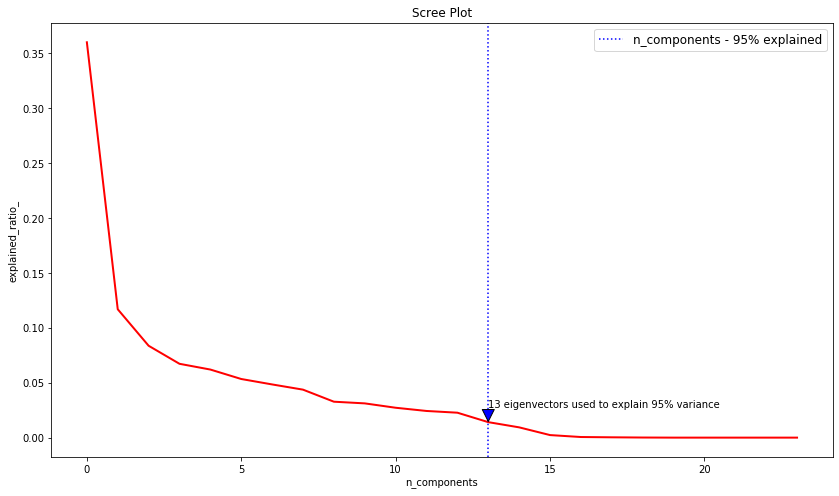

In [130]:
 
# Trying with Dimentionality reduction

n_components = scaled_data.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
num_var_pca = pca.fit(scaled_data).transform(scaled_data)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 2 n_compononets: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 5 n_compononets: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 7 n_compononets: ", sum(a["Explained Variance"][0:7]))
print("Variance explain with 9 n_compononets: ", sum(a["Explained Variance"][0:9]))
print("Variance explain with 11 n_compononets: ", sum(a["Explained Variance"][0:11]))
print("Variance explain with 13 n_compononets: ", sum(a["Explained Variance"][0:13]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))
print("Variance explain with 18 n_compononets: ", sum(a["Explained Variance"][0:18]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.title('Scree Plot')
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(13,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('13 eigenvectors used to explain 95% variance', xy=(13, pca.explained_variance_ratio_[13]), 
             xytext=(13, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

In [ ]:
#We can clearly see that with 13 components, it explains 95% of the variance in the dataset, hence we will employ PCA 
#again using 13 components

In [140]:
pca=PCA(n_components=13)
pca.fit(scaled_data)
scores=pca.transform(scaled_data)

In [141]:
scores.shape

(226786, 13)

In [143]:
#We shall now visualize the components against the features to understand
#which components relates to which features of the dataset

#loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8',
  #                                                 'PC9', 'PC10','PC11', 'PC12','PC13'])
scores_df=pd.DataFrame(scores,columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8',
                                                   'PC9', 'PC10','PC11', 'PC12','PC13'])
scores_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-3.073851,-0.119483,-1.219222,-1.477023,-0.117189,0.975466,-0.185200,-0.036721,-1.351096,-0.160110,-0.393864,1.171701,-0.133219
1,-3.855634,-0.199175,-1.997624,-1.487596,1.010118,-0.210480,1.070869,-0.514134,-0.825884,-0.017314,0.396962,-0.155718,-1.347780
2,-1.073306,0.325280,0.536227,0.294136,0.081798,-1.088038,0.031386,3.446812,-0.177631,-0.208456,0.152218,0.147404,0.451012
3,-3.210898,-0.643333,-0.084555,0.847088,0.551994,-1.277179,0.616279,-0.203776,-1.813637,-0.680381,-0.466924,0.255008,-0.291807
4,-3.516523,-0.194435,-2.167985,-1.283763,0.701706,-0.591731,1.692324,-0.631870,-0.293651,0.050237,0.292742,-0.524989,-0.582505


In [145]:
scores_df.shape

(226786, 13)

In [144]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.35998166, 0.11688535, 0.08365467, 0.06721958, 0.06198215,
       0.05337803, 0.0484354 , 0.0436882 , 0.03271014, 0.03118414,
       0.02720626, 0.02427516, 0.02269854])

In [ ]:
#Categorical variables to be converted to numeric:
#term
#grade
#home ownership
#verification status
#payment plan
#purpose
#address state
#application type
#loan status